In [3]:
import json

def parse_sample_stats(json_file):

    with open(json_file) as fobj:
        sample_stats_raw = json.load(fobj)

    parse_coord = lambda c: tuple(int(x) for x in c.replace('(', '').replace(')', '').replace(' ', '').split(',') )
    sample_stats = { kind: { ang : { parse_coord(coord): data for coord, data in stats.items() }
                            for ang, stats in angles.items() }
                    for kind, angles in sample_stats_raw.items() }

    return sample_stats

In [66]:
stats = parse_sample_stats('/data1/image/stage/perp-check-3/null-analysis.json')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [23]:
def get_kind_and_angle(stats, kind, angle):
    
    matrix = stats[kind][angle]
    rows, cols = sorted(matrix.keys())[-1]
    size = (rows + 1, cols + 1)
    mat_median = np.empty(size, int)
    mat_max = np.empty(size, int)
    
    for (i, j), (median_val, max_val) in matrix.items():
        mat_median[i, j] = median_val
        mat_max[i, j] = max_val
        
    return mat_median, mat_max, size

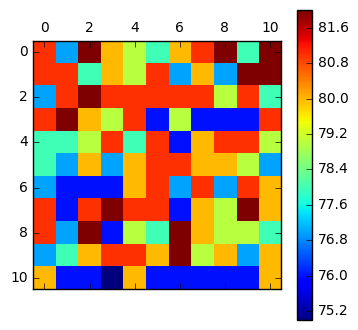

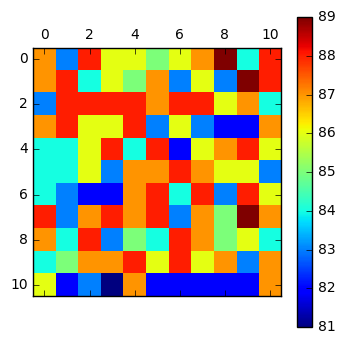

In [54]:
mat_med, mat_max, _ = get_kind_and_angle(stats, 'ppl', '0')
plt.matshow(mat_med)
plt.colorbar()
plt.matshow(mat_max)
plt.colorbar()

In [40]:
def get_kind_tensor(stats, kind):
    
    angles = sorted(stats[kind].keys())    
    _, _, (rows, cols) = get_kind_and_angle(stats, kind, angles[0])
    size = (len(angles), rows, cols)
    tensor_med = np.empty(size)
    tensor_max = np.empty(size)
    
    for k, angle in enumerate(angles):
        slice_med, slice_max, _ = get_kind_and_angle(stats, kind, angle)
        tensor_med[k] = slice_med
        tensor_max[k] = slice_max

    return tensor_med, tensor_max, [int(a) for a in angles]

In [67]:
ts_med, ts_max, ts_angles = get_kind_tensor(stats, 'xpl')

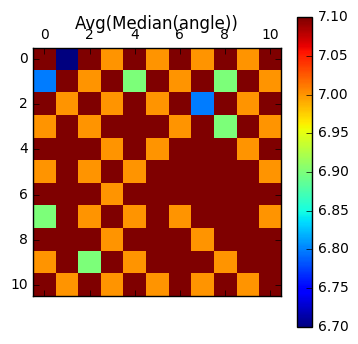

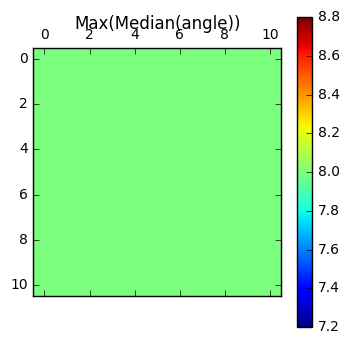

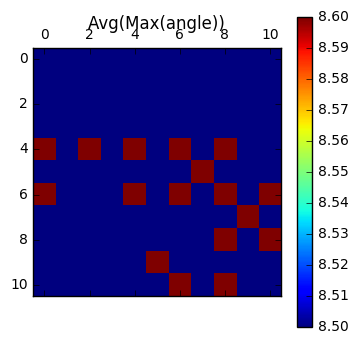

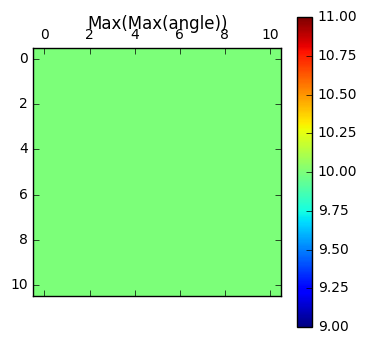

In [68]:
plt.matshow(ts_med.mean(axis=0))
plt.colorbar()
plt.title('Avg(Median(angle))')
plt.matshow(ts_med.max(axis=0))
plt.colorbar()
plt.title('Max(Median(angle))')
plt.matshow(ts_max.mean(axis=0))
plt.colorbar()
plt.title('Avg(Max(angle))')
plt.matshow(ts_max.max(axis=0))
plt.colorbar()
plt.title('Max(Max(angle))')

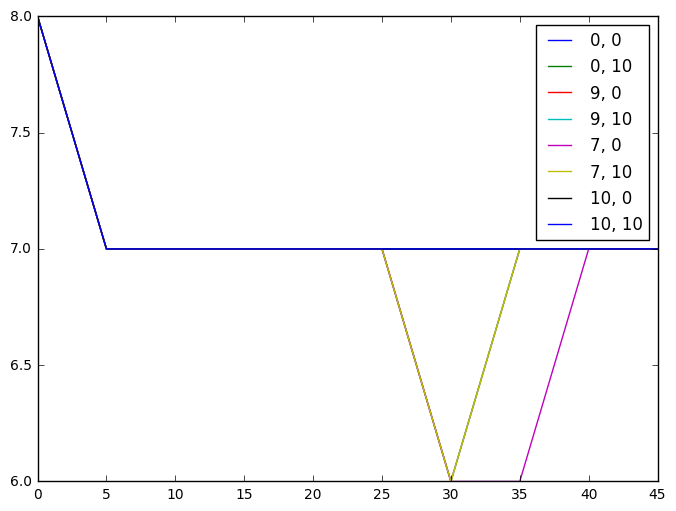

In [69]:
plt.figure(figsize=(8,6))
plt.plot(5*np.r_[ts_angles], ts_med[:, 0, 0], label='0, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 0, 10], label='0, 10')
plt.plot(5*np.r_[ts_angles], ts_med[:, 5, 0], label='9, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 5, 10], label='9, 10')
plt.plot(5*np.r_[ts_angles], ts_med[:, 7, 0], label='7, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 7, 10], label='7, 10')
plt.plot(5*np.r_[ts_angles], ts_med[:, 10, 0], label='10, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 10, 10], label='10, 10')
plt.legend()

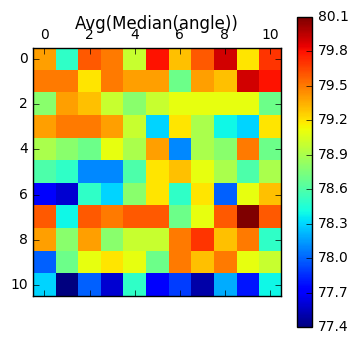

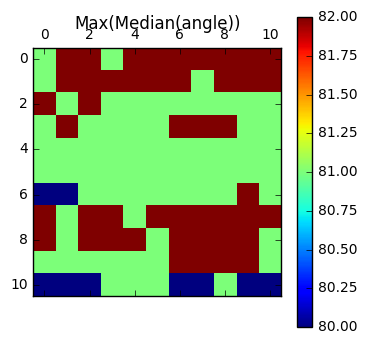

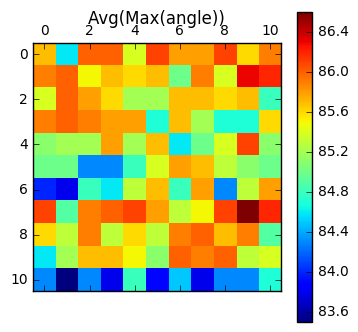

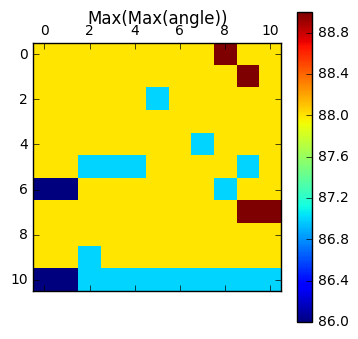

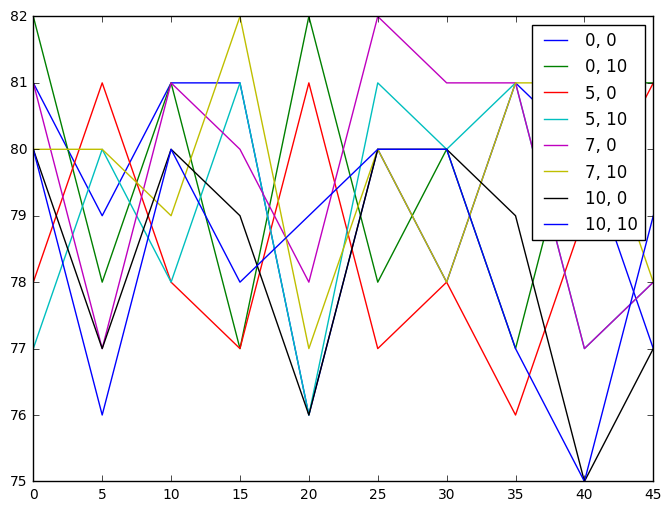

In [58]:
ts_med, ts_max, ts_angles = get_kind_tensor(stats, 'ppl')
plt.matshow(ts_med.mean(axis=0))
plt.colorbar()
plt.title('Avg(Median(angle))')
plt.matshow(ts_med.max(axis=0))
plt.colorbar()
plt.title('Max(Median(angle))')
plt.matshow(ts_max.mean(axis=0))
plt.colorbar()
plt.title('Avg(Max(angle))')
plt.matshow(ts_max.max(axis=0))
plt.colorbar()
plt.title('Max(Max(angle))')
plt.figure(figsize=(8,6))
plt.plot(5*np.r_[ts_angles], ts_med[:, 0, 0], label='0, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 0, 10], label='0, 10')
plt.plot(5*np.r_[ts_angles], ts_med[:, 5, 0], label='5, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 5, 10], label='5, 10')
plt.plot(5*np.r_[ts_angles], ts_med[:, 7, 0], label='7, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 7, 10], label='7, 10')
plt.plot(5*np.r_[ts_angles], ts_med[:, 10, 0], label='10, 0')
plt.plot(5*np.r_[ts_angles], ts_med[:, 10, 10], label='10, 10')
plt.legend()